Q1. Is gender independent of education level? A random sample of 395 people were
surveyed and each person was asked to report the highest education level they
obtained. The data that resulted from the survey is summarized in the following table:

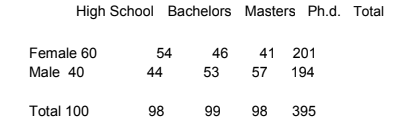

Question: Are gender and education level dependent at 5% level of significance? In
other words, given the data collected above, is there a relationship between the
gender of an individual and the level of education that they have obtained?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import math

In [2]:
female = [60,54,46,41]
male = [40,44,53,57]
index = ['High school','Bachelors','Masters','Ph.d.']
df = pd.DataFrame({'Female': female, 'Male': male}, index = index)
df

,Female,Male
High school,60,40
Bachelors,54,44
Masters,46,53
Ph.d.,41,57


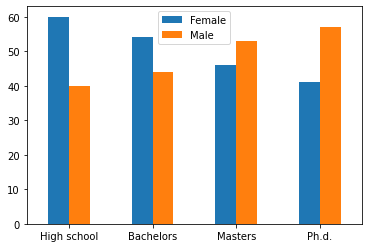

In [3]:
ax = df.plot.bar(rot = 0)

#### Hypothesis statement
- Ho: There is no significant relationship between gender and label of education.
- H1: There is significant relationship between gender and label of education.
- Critical value of χ2 for chi-squared test at for 0.05 significance level and 3 degree of freedom is 7.815.

In [4]:
n = df.to_numpy()
from scipy.stats import chi2_contingency
chi2_contingency(n)

(8.006066246262538,
 0.045886500891747214,
 3,
 array([[50.88607595, 49.11392405],
        [49.86835443, 48.13164557],
        [50.37721519, 48.62278481],
        [49.86835443, 48.13164557]]))

- Calculated chi-squared (given): χ2 = 8.006
- Degree of freedom = 3
- Critical value at 5% level of significance = 7.815 
##### Conclusion:
Since the calculated chi-square value is larger than the critical value, the null hypothesis is rejected.

Q2. Using the following data, perform a oneway analysis of variance using α=.05. Write
up the results in APA format.

[Group1: 51, 45, 33, 45, 67]

[Group2: 23, 43, 23, 43, 45]

[Group3: 56, 76, 74, 87, 56]

In [5]:
g1 = [51, 45, 33, 45, 67]
g2 = [23, 43, 23, 43, 45]
g3 = [56, 76, 74, 87, 56]
df = pd.DataFrame({'Group_1': g1, 'Group_2': g2, 'Group_3': g3})
df.loc['mean',:]= df.mean(axis=0, numeric_only = True, skipna = True)
df

,Group_1,Group_2,Group_3
0,51.0,23.0,56.0
1,45.0,43.0,76.0
2,33.0,23.0,74.0
3,45.0,43.0,87.0
4,67.0,45.0,56.0
mean,48.2,35.4,69.8


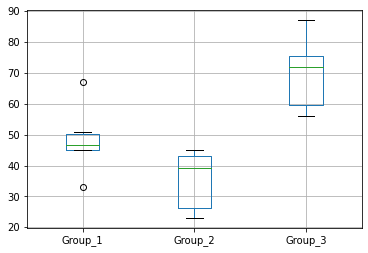

In [6]:
boxplot = df.boxplot(column=['Group_1', 'Group_2', 'Group_3'])

In [7]:
a = df.to_numpy().T
b = a.mean(axis = 1)

In [8]:
# Group_1
df1 = pd.DataFrame(g1, columns = ['Values'])
df1['Mean'] = b[0]
df1['Deviations'] = df1['Values']-df1['Mean']
df1['Square_of_deviations'] = df1['Deviations']**2
df1

,Values,Mean,Deviations,Square_of_deviations
0,51,48.2,2.8,7.84
1,45,48.2,-3.2,10.24
2,33,48.2,-15.2,231.04
3,45,48.2,-3.2,10.24
4,67,48.2,18.8,353.44


In [9]:
# Group_2
df2 = pd.DataFrame(g2, columns = ['Values'])
df2['Mean'] = b[1]
df2['Deviations'] = df2['Values']-df2['Mean']
df2['Square_of_deviations'] = df2['Deviations']**2
df2

,Values,Mean,Deviations,Square_of_deviations
0,23,35.4,-12.4,153.76
1,43,35.4,7.6,57.76
2,23,35.4,-12.4,153.76
3,43,35.4,7.6,57.76
4,45,35.4,9.6,92.16


In [10]:
# Group_3
df3 = pd.DataFrame(g3, columns = ['Values'])
df3['Mean'] = b[2]
df3['Deviations'] = df3['Values']-df3['Mean']
df3['Square_of_deviations'] = df3['Deviations']**2
df3

,Values,Mean,Deviations,Square_of_deviations
0,56,69.8,-13.8,190.44
1,76,69.8,6.2,38.44
2,74,69.8,4.2,17.64
3,87,69.8,17.2,295.84
4,56,69.8,-13.8,190.44


In [11]:
# with in the group
ss_w = [df1['Square_of_deviations'].sum(), df2['Square_of_deviations'].sum(),df3['Square_of_deviations'].sum()]
print('Sum of square of deviations with in the groups:',ss_w)

Sum of square of deviations with in the groups: [612.8, 515.2, 732.8]


In [12]:
v_w = [x / 4 for x in ss_w]
print('Variance of square of deviations:',v_w)

Variance of square of deviations: [153.2, 128.8, 183.2]


In [13]:
mse_w = sum(v_w)/3
print('Mean square error:',mse_w)

Mean square error: 155.06666666666666


In [14]:
df_w = 15 - 3
print('The error degrees of freedom:',df_w)

The error degrees of freedom: 12


In [15]:
sse_w = mse_w*df_w
print('Sum of square error:',sse_w)

Sum of square error: 1860.8


In [16]:
gm = sum(b)/3
print('Grand mean',gm)

Grand mean 51.133333333333326


In [17]:
# between the groups
d = pd.DataFrame({'Group_mean': b})
d['Grand_mean'] = d['Group_mean'].mean()
d['Deviation'] = d['Group_mean']-d['Grand_mean']
d['Square_of_deviations'] = d['Deviation']**2
d

,Group_mean,Grand_mean,Deviation,Square_of_deviations
0,48.2,51.133333,-2.933333,8.604444
1,35.4,51.133333,-15.733333,247.537778
2,69.8,51.133333,18.666667,348.444444


In [18]:
ss_b = d['Square_of_deviations'].sum()
print('Sum of square of deviations between the groups:',ss_b)

Sum of square of deviations between the groups: 604.5866666666666


In [19]:
v_b = ss_b/2
print('Variance of square of deviations between the groups:',v_b)

Variance of square of deviations between the groups: 302.2933333333333


In [20]:
mse_b = v_b * 5
mse_b

1511.4666666666665

In [21]:
df_b = 3-1
df_b

2

In [22]:
sse_b = mse_b*df_b
sse_b

3022.933333333333

In [23]:
f_calculated = mse_b/mse_w
f_calculated

9.747205503009457

In [24]:
an = pd.DataFrame({'source': ['Between_groups','Within_groups']})
an['Sum of sq'] = [sse_b,sse_w]
an['Degree of freedom'] = [df_b,df_w]
an['Mean of square'] = [mse_b,mse_w]
print('Total_sum_of_square:',round(an['Sum of sq'].sum(),2))
print('F_critical(2,12): 3.89')
print('Since calculated F score is greater than the critical value, the null hypothesis is rejected i.e. μ1, μ2 and μ3 are not equal.')
an

Total_sum_of_square: 4883.73
F_critical(2,12): 3.89
Since calculated F score is greater than the critical value, the null hypothesis is rejected i.e. μ1, μ2 and μ3 are not equal.


,source,Sum of sq,Degree of freedom,Mean of square
0,Between_groups,3022.933333,2,1511.466667
1,Within_groups,1860.800000,12,155.066667


--------

Q.3 Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.

In [25]:
from scipy.stats import f_oneway
a = [10, 20, 30, 40, 50]
b = [5, 10, 15, 20, 25]
f_oneway(a,b)

F_onewayResult(statistic=3.6, pvalue=0.0943497728424377)